In [1]:
import pandas as pd

df=pd.read_csv('/content/Grammar Correction.csv', sep=',')

print(f'Data shape = {df.shape}')

df.head()

Data shape = (2018, 4)


,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [2]:
# summary of the dataset
summary = df.describe(include='all')
summary

,Serial Number,Error Type,Ungrammatical Statement,Standard English
count,2018.000000,2018,2018,2018
unique,NaN,36,2016,2009
top,NaN,Sentence Structure Errors,The plants needs to be watered every day.,The Earth revolves around the Sun.
freq,NaN,103,2,2
mean,1009.500000,NaN,NaN,NaN
std,582.690741,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,505.250000,NaN,NaN,NaN
50%,1009.500000,NaN,NaN,NaN
75%,1513.750000,NaN,NaN,NaN


In [3]:
#finding null values of the dataset

missing_values = df.isnull().sum()
missing_values

,0
Serial Number,0
Error Type,0
Ungrammatical Statement,0
Standard English,0


In [4]:
#cleaning the dataset

In [5]:
#removing duplicates
df_new = df.drop_duplicates()
print(f"old dataset's shape= {df.shape}")
print(f"new dataset's shape= {df_new.shape}")

old dataset's shape= (2018, 4)
new dataset's shape= (2018, 4)


In [6]:
#Standardize the text format

In [7]:
df.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [8]:
# removing leading spaces

df_new['Ungrammatical Statement'] = df_new['Ungrammatical Statement'].str.strip()
df_new['Standard English'] = df_new['Standard English'].str.strip()

In [9]:
# striping unwanted characters like numbers at the start
df_new['Ungrammatical Statement'] = df_new['Ungrammatical Statement'].str.replace(r'^\d+\.\s', '', regex=True)
df_new['Standard English'] = df_new['Standard English'].str.replace('^\d+\.\s+', '', regex=True)

In [10]:
print(f"new dataset's shape= {df_new.shape}")

new dataset's shape= (2018, 4)


In [11]:
# number of each type of grammatical error

error_counts = df_new['Error Type'].value_counts()
error_counts

,count
Error Type,
Sentence Structure Errors,103
Verb Tense Errors,100
Subject-Verb Agreement,100
Article Usage,100
Spelling Mistakes,100
Preposition Usage,95
Punctuation Errors,60
Relative Clause Errors,51
Gerund and Participle Errors,50


In [12]:
#analyzing the length of sentences in 'Ungrammatical Statement' and 'Standard English'
df_new['Ungrammatical Statement Length'] = df_new['Ungrammatical Statement'].apply(len)
df_new['Standard English Length'] = df_new['Standard English'].apply(len)

In [13]:
df_new.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

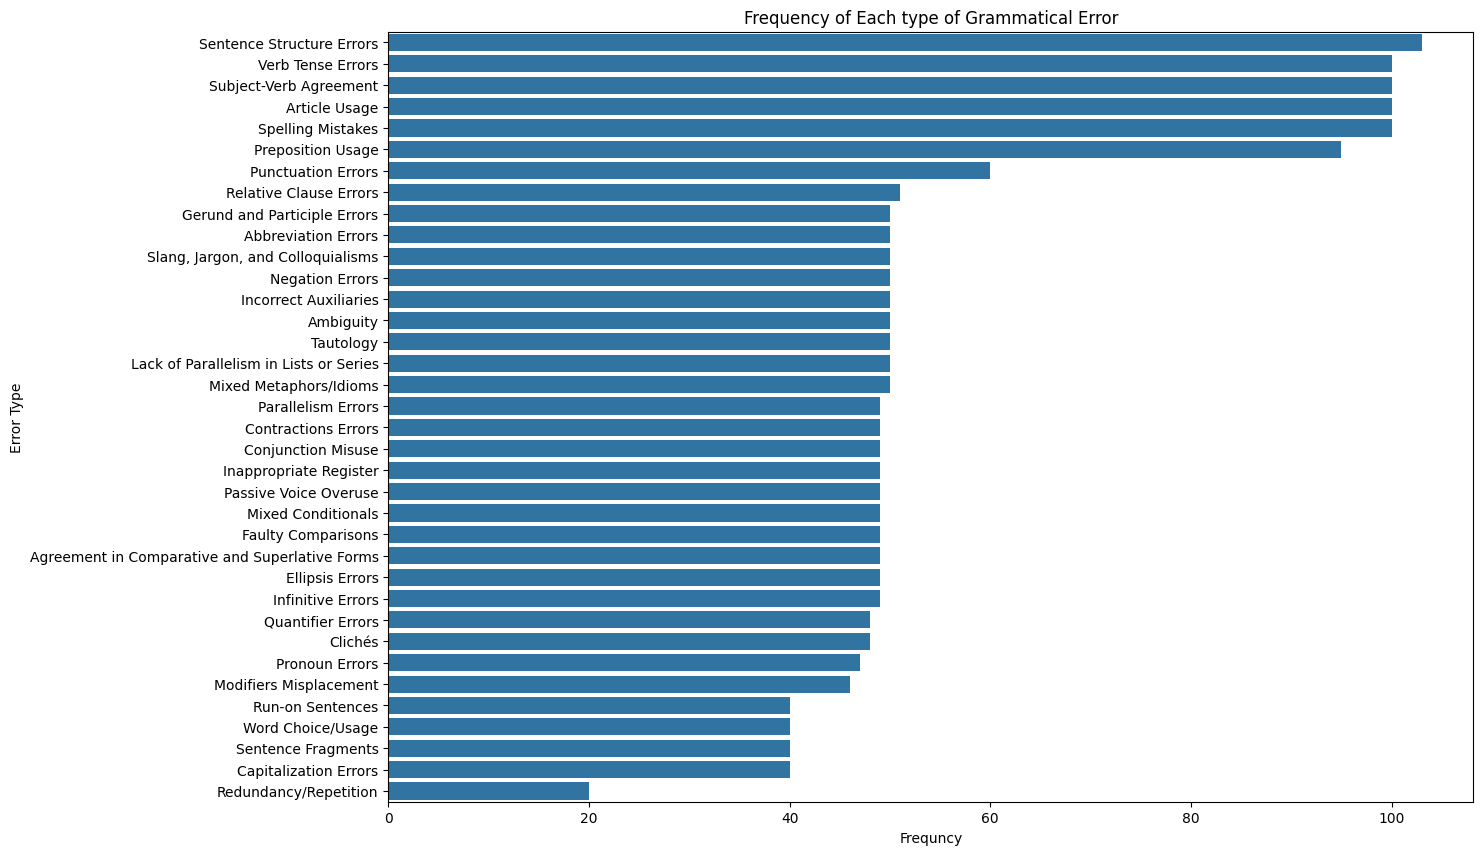

In [15]:
# visualizing the distributions of error types
plt.figure(figsize=(14,10))
error_type_plot = sns.countplot(y=df_new['Error Type'], order=df_new['Error Type'].value_counts().index)
error_type_plot.set_title('Frequency of Each type of Grammatical Error')
error_type_plot.set_xlabel('Frequncy')
error_type_plot.set_ylabel('Error Type')

sns.set_style("dark")

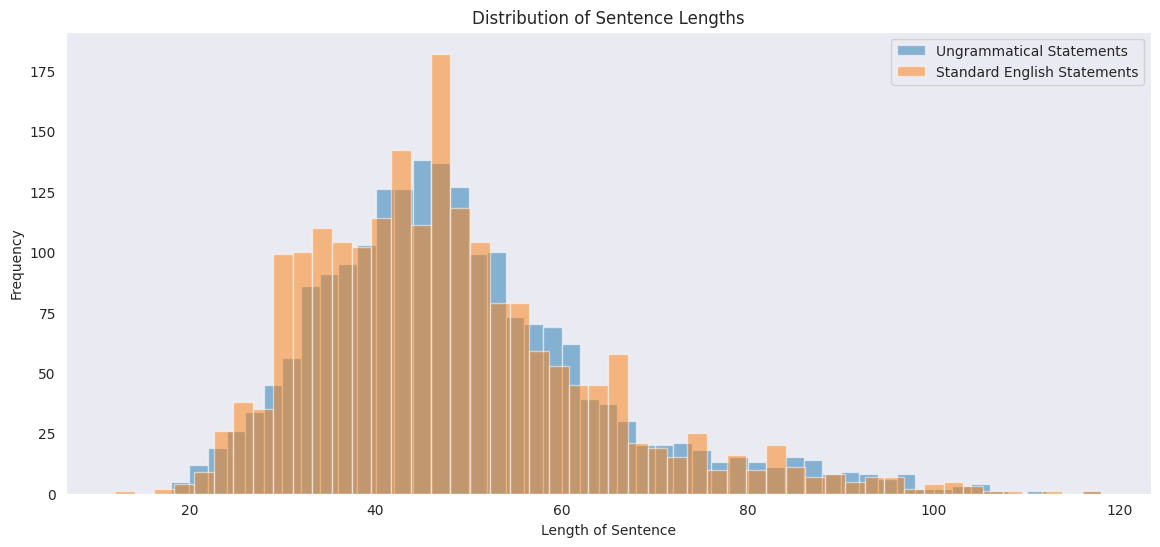

In [16]:
# visualization of the sentence lenght in both columns
plt.figure(figsize=(14,6))
plt.hist(df_new['Ungrammatical Statement Length'], bins=50, alpha=0.5, label='Ungrammatical Statements')
plt.hist(df_new['Standard English Length'], bins=50, alpha=0.5, label='Standard English Statements')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Length of Sentence')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [17]:
#### word frequncey analysis ####

In [18]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#functions to calculate word frequency
def word_frequency(sentences):
  words = []
  for sentence in sentences:
    words.extend(word_tokenize(sentence.lower()))
  return Counter(words)

#calculating word frequency for botth ungrammatical and corrected statments
ungrammatical_freq = word_frequency(df_new['Ungrammatical Statement'])
corrected_freq = word_frequency(df_new['Standard English'])

#getting the top 20 most frequent words in each category
top_ungrammatical = ungrammatical_freq.most_common(20)
top_corrected = corrected_freq.most_common(20)

top_ungrammatical
top_corrected

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('the', 2118),
 ('.', 1972),
 (',', 542),
 ('to', 493),
 ('is', 453),
 ('a', 379),
 ('and', 341),
 ('was', 321),
 ('i', 293),
 ('in', 263),
 ('she', 256),
 ('of', 230),
 ('he', 214),
 ("'s", 170),
 ('for', 151),
 ('on', 134),
 ('at', 133),
 ("n't", 117),
 ('are', 112),
 ('it', 101)]

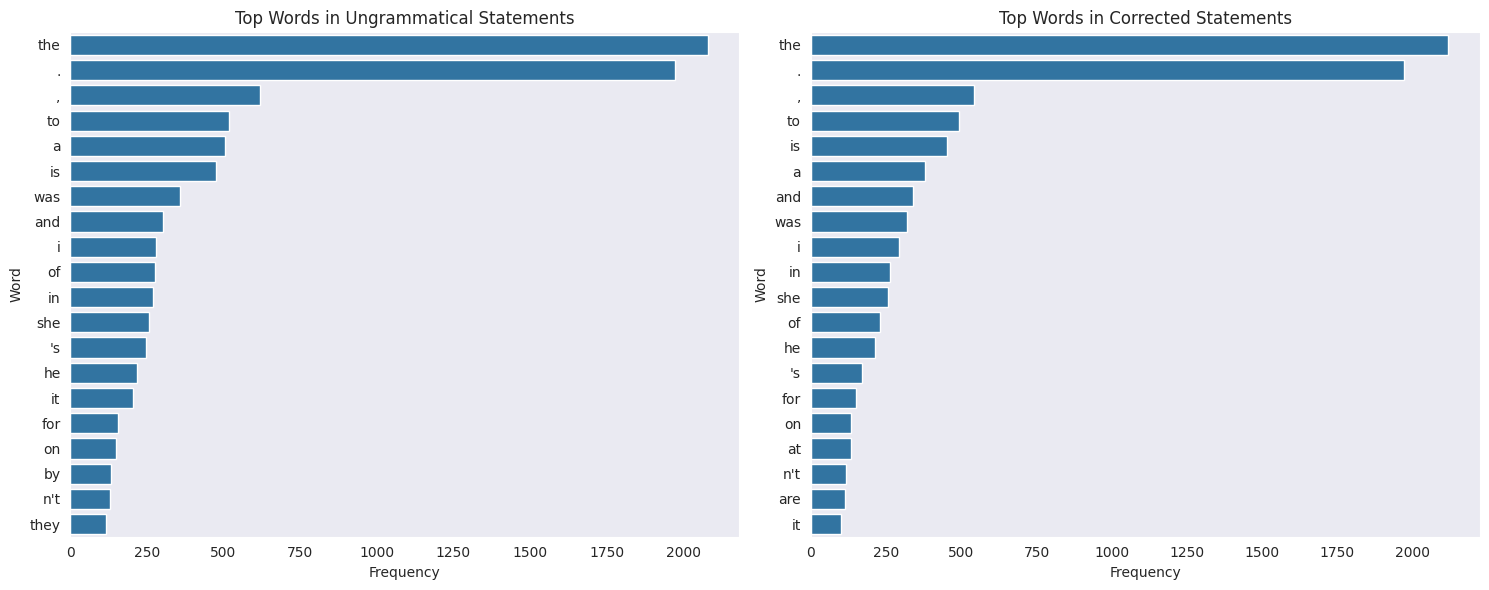

In [19]:
top_ungrammatical_df = pd.DataFrame(top_ungrammatical, columns=['Word', 'Frequency'])
top_corrected_df = pd.DataFrame(top_corrected, columns=['Word', 'Frequency'])

#bar plot
plt.figure(figsize=(15,6))

#ungrammatical Statements
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=top_ungrammatical_df)
plt.title('Top Words in Ungrammatical Statements')

#corrected statements
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=top_corrected_df)
plt.title('Top Words in Corrected Statements')

plt.tight_layout()
plt.show()

In [20]:
# part of speech

In [21]:
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

def pos_tag_sentences(sentences):
    tagged_sentences = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        tagged = pos_tag(tokens)
        tagged_sentences.extend(tagged)
    return tagged_sentences

tagged_ungrammatical = pos_tag_sentences(df_new['Ungrammatical Statement'])
tagged_corrected = pos_tag_sentences(df_new['Standard English'])

#counting the frequecny of each POS tag
ungrammatical_pos_counts = pd.Series([tag for _, tag in tagged_ungrammatical]). value_counts()
corrected_pos_counts = pd.Series([tag for _, tag in tagged_corrected]).value_counts()

ungrammatical_pos_counts
corrected_pos_counts

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,count
NN,3666
DT,2769
.,2023
IN,1523
PRP,1162
JJ,1093
VBD,948
NNS,917
VBZ,878
VB,658


In [22]:
# analyzing pos tags

<Figure size 2000x1400 with 0 Axes>

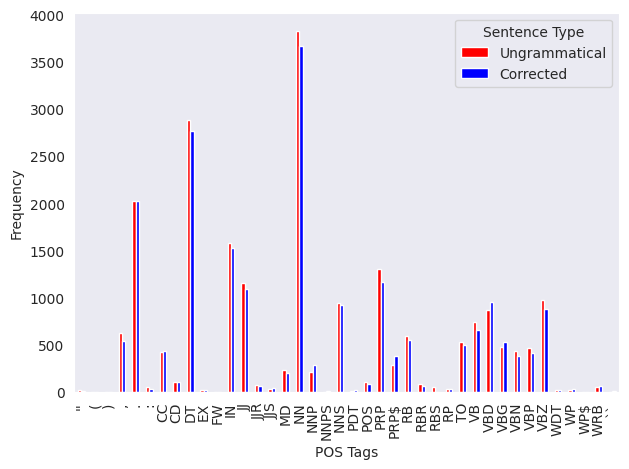

In [23]:
#converting dataframe for visualization

pos_df = pd.DataFrame({
    'Ungrammatical': ungrammatical_pos_counts,
    'Corrected': corrected_pos_counts
}).fillna(0)

#plot
plt.figure(figsize=(20,14))
pos_df.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Sentence Type')
plt.tight_layout()
plt.show()

In [24]:
pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.5 MB/s eta 0:00:00


In [25]:
import textstat

#compute the readability scores for ungrammatical sentences
ungrammatical_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_new['Ungrammatical Statement']]

#compute the readability scores for corrected sentences
corrected_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_new['Standard English']]

avg_ungrammatical_score = sum(ungrammatical_readability) / len(ungrammatical_readability)
avg_corrected_score = sum(corrected_readability) / len(corrected_readability)

print(f'Average Ungrammatical Readability = {avg_ungrammatical_score}')
print(f'Average Coorected Readability = {avg_corrected_score}')

Average Ungrammatical Readability = 82.42183845391477
Average Coorected Readability = 80.11340931615477


In [26]:
pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.0 MB/s eta 0:00:00


In [27]:
import numpy as np
from Levenshtein import distance as levenshtein_distance

#assuming 'ungrammatical_sentences' and 'corrected_sentences' are lists of sentences
difficulty_index = []

for ungrammatical, corrected in zip(df_new['Ungrammatical Statement'], df_new['Standard English']):
  edit_distance = levenshtein_distance(ungrammatical, corrected)
  normalized_difficulty = edit_distance / max(len(ungrammatical), len(corrected))
  difficulty_index.append(normalized_difficulty)

difficulty_index = np.array(difficulty_index)

difficulty_levels = ['Easy' if x < 0.2 else 'Medium' if x < 0.5 else 'Hard' for x in difficulty_index]

difficulty_counts = Counter(difficulty_levels)

difficulty_counts

Counter({'Easy': 1546, 'Medium': 371, 'Hard': 101})

In [28]:
## N-gram Analysis

In [29]:
from nltk import bigrams, trigrams
from collections import Counter

tokens = [nltk.word_tokenize(sentence.lower()) for sentence in df_new['Ungrammatical Statement']]

#bi-grams and tri-grams
bi_grams = [gram for sentence in tokens for gram in bigrams(sentence)]
tri_grams = [gram for sentence in tokens for gram in trigrams(sentence)]

#counting
bi_grams_freq = Counter(bi_grams)
tri_grams_freq = Counter(tri_grams)

#most common bi-grams and tri-grams
most_common_bi = bi_grams_freq.most_common(10)
most_common_tri = tri_grams_freq.most_common(10)

most_common_bi, most_common_tri

([(('in', 'the'), 142),
  ((',', 'and'), 142),
  ((',', 'but'), 100),
  (('to', 'the'), 87),
  (('of', 'the'), 82),
  (('by', 'the'), 79),
  (('it', "'s"), 75),
  (('at', 'the'), 60),
  (('on', 'the'), 53),
  (('the', 'store'), 45)],
 [((',', 'and', 'to'), 43),
  ((',', 'but', 'it'), 32),
  ((',', 'and', 'it'), 23),
  (('went', 'to', 'the'), 20),
  (('the', 'movie', 'was'), 19),
  ((',', 'it', "'s"), 19),
  (('to', 'the', 'store'), 18),
  (('but', 'it', 'is'), 18),
  (('the', 'group', 'of'), 15),
  (('is', 'the', 'most'), 15)])

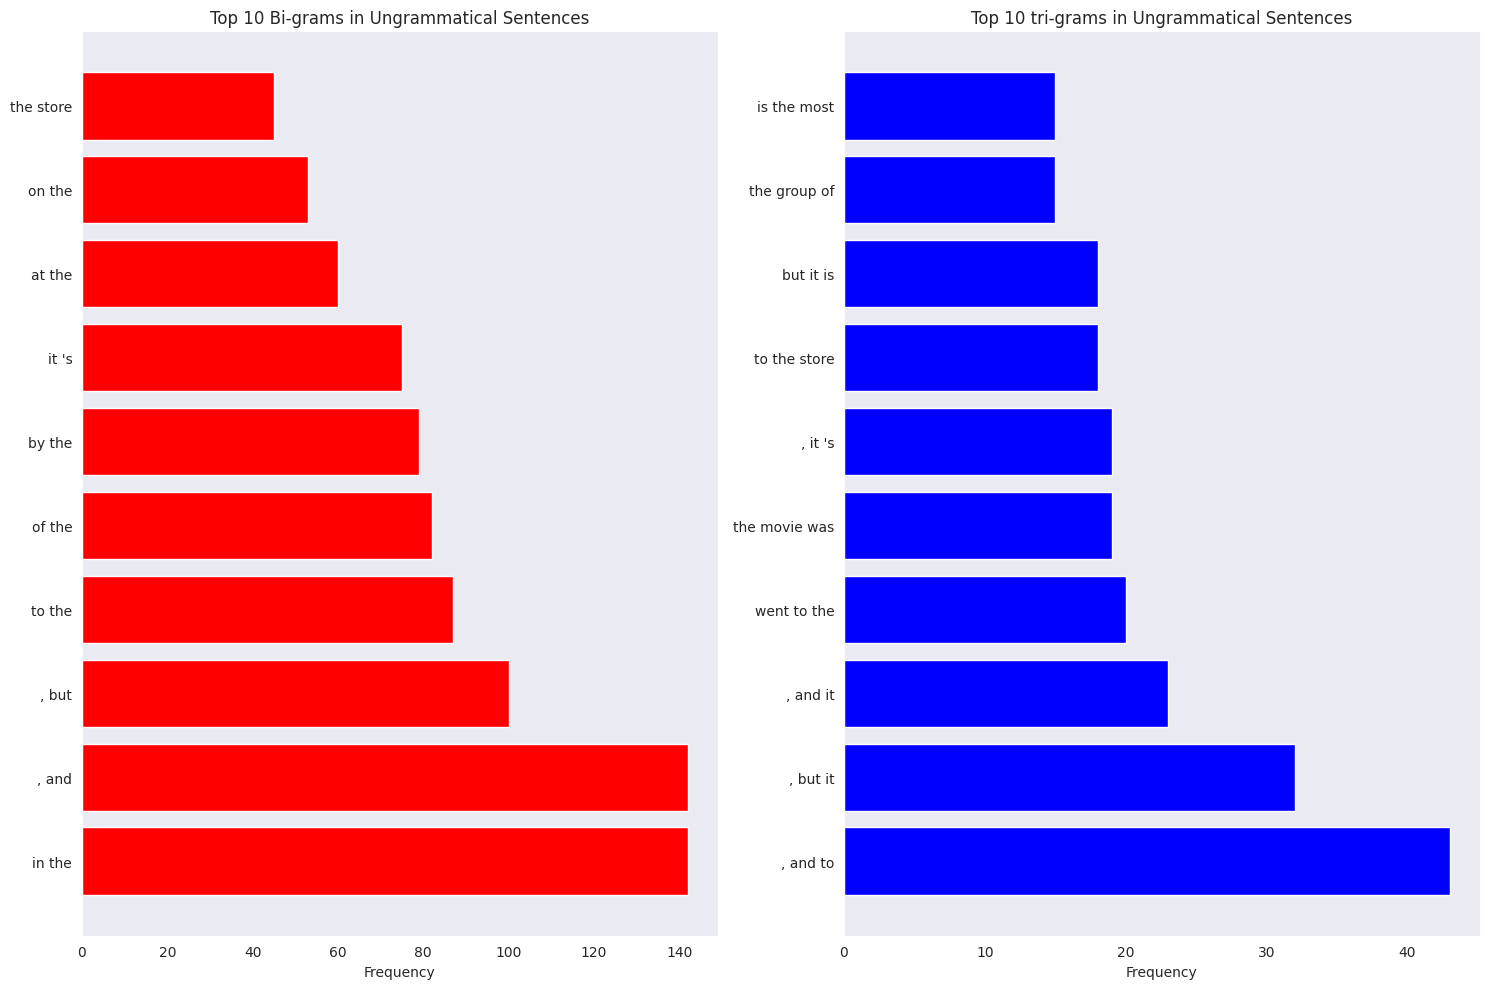

In [30]:
bi_grams, bi_freq = zip(*most_common_bi)
tri_grams, tri_freq = zip(*most_common_tri)

#converting n gram tuples to strings
bi_grams_str = [' '.join(gram) for gram in bi_grams]
tri_grams_str = [' '.join(gram) for gram in tri_grams]

plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.barh(bi_grams_str, bi_freq, color='red')
plt.xlabel('Frequency')
plt.title('Top 10 Bi-grams in Ungrammatical Sentences')

plt.subplot(1, 2, 2)
plt.barh(tri_grams_str, tri_freq, color='blue')
plt.xlabel('Frequency')
plt.title('Top 10 tri-grams in Ungrammatical Sentences')

plt.tight_layout()
plt.show()

In [31]:
from textblob import TextBlob
ungrammatical_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_new['Ungrammatical Statement']]
corrected_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_new['Standard English']]

#calculating average sentiment, compare individual sentence sentiment
avg_ug_sentiment = sum(ungrammatical_sentiments) / len(ungrammatical_sentiments)
avg_corr_sentiment = sum(corrected_sentiments) / len(corrected_sentiments)

print(f'Average Sentiment for Ungrammatical Sentences:{avg_ug_sentiment}')
print(f'Average Sentiment for Corrected Senetences:{avg_corr_sentiment}')


Average Sentiment for Ungrammatical Sentences:0.0987968938340592
Average Sentiment for Corrected Senetences:0.0898120780634406


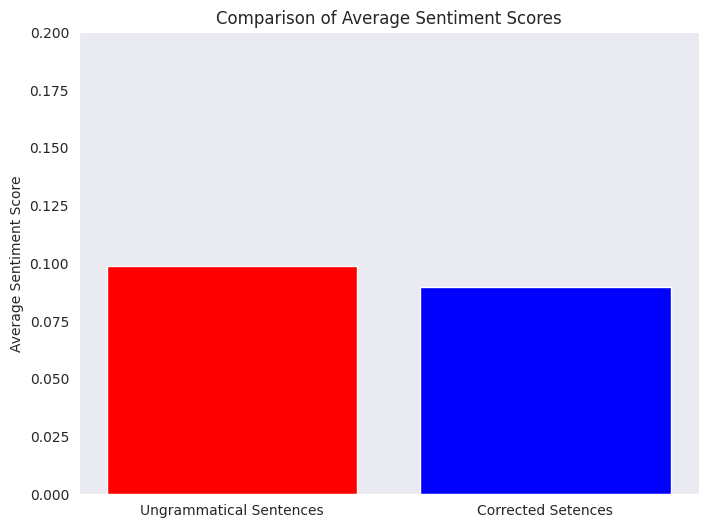

In [32]:
# sentiment scores
scores = [avg_ug_sentiment, avg_corr_sentiment]
labels = ['Ungrammatical Sentences', 'Corrected Setences']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['red', 'blue'])
plt.ylabel('Average Sentiment Score')
plt.title('Comparison of Average Sentiment Scores')
plt.ylim(0, 0.2)
plt.show()

In [33]:
###Correction Pattern Mining

In [34]:
from nltk import word_tokenize

nltk.download('punkt')

def align_and_find_changes(sentence1, sentence2):
  tokens1 = word_tokenize(sentence1)
  tokens2 = word_tokenize(sentence2)
  max_len = max(len(tokens1), len(tokens2))
  aligned_tokens1 = tokens1 + [''] * (max_len - len(tokens1))
  aligned_tokens2 = tokens2 + [''] * (max_len - len(tokens2))

  changes = []
  for token1, token2 in zip(aligned_tokens1, aligned_tokens2):
    if token1 != token2:
      changes.append((token1, token2))
    return changes

#apply the function to each pair of sentences
df_new['Changes'] = df_new.apply(lambda row: align_and_find_changes(row['Ungrammatical Statement'], row['Standard English']), axis=1)
df_new.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length,Changes
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,[]
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,[]
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,[]
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,[]
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,[]


In [35]:
from collections import Counter

# Flatten the list of changes and count the occurrences
all_changes = [change for changes in df_new['Changes'] for change in changes]
change_counter = Counter(all_changes)

# Display the most common changes
most_common_changes = change_counter.most_common(20)
print("Most Common Changes:")
for change, frequency in most_common_changes:
    print(f"{change}: {frequency}")

Most Common Changes:
('i', 'I'): 11
('the', 'The'): 10
('She', 'Her'): 6
('he', 'He'): 3
('she', 'She'): 3
('They', 'Their'): 3
('Their', 'There'): 3
('Their', 'They'): 2
('my', 'My'): 2
('can', 'Can'): 2
('we', 'We'): 2
('The', 'Sarah'): 2
('The', 'Jane'): 2
('Me', 'He'): 2
('Me', 'She'): 2
('The', 'I'): 2
('Lem', 'Let'): 2
('You', 'Do'): 2
('It', 'Its'): 2
('He', 'His'): 2


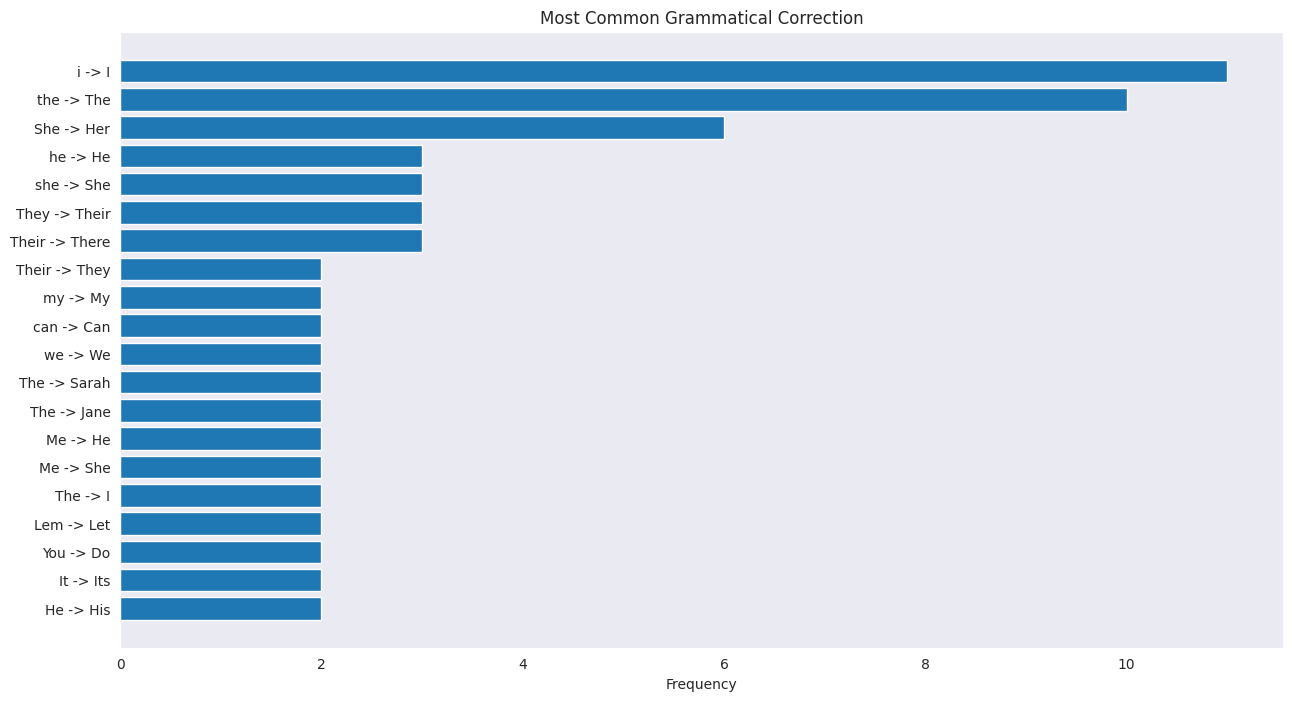

In [36]:
changes, frequencies = zip(*most_common_changes)

#convert change tuples to string format for labeling
change_labels = [f'{original} -> {corrected}' for original, corrected in changes]

plt.figure(figsize=(15,8))
plt.barh(change_labels, frequencies)
plt.xlabel('Frequency')
plt.title('Most Common Grammatical Correction')
plt.gca().invert_yaxis()
plt.show()


In [37]:
def categorize_change(change):
  original, corrected = change
  if original == '':
    return 'Insertion'
  elif corrected == '':
    return 'Deletion'
  else:
    return 'Substitution'

df_new['Change Types'] = df_new['Changes'].apply(lambda chnages: [categorize_change(change) for change in changes])
df_new.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length,Changes,Change Types
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,[],"[Substitution, Substitution, Substitution, Sub..."
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,[],"[Substitution, Substitution, Substitution, Sub..."
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,[],"[Substitution, Substitution, Substitution, Sub..."
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,[],"[Substitution, Substitution, Substitution, Sub..."
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,[],"[Substitution, Substitution, Substitution, Sub..."


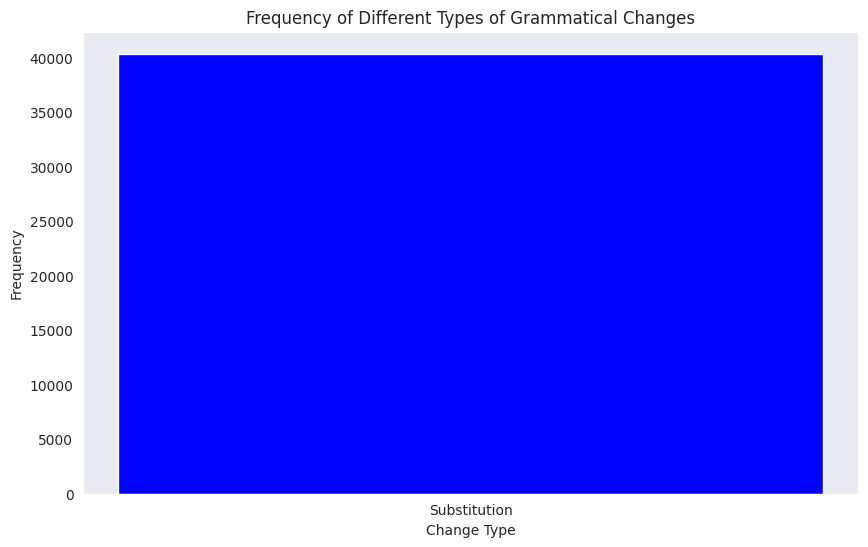

In [38]:
from collections import Counter

change_type_counter = Counter([change_type for change_types in df_new['Change Types'] for change_type in change_types])

change_types, frequencies = zip(*change_type_counter.items())

plt.figure(figsize=(10, 6))
plt.bar(change_types, frequencies, color='blue')
plt.xlabel('Change Type')
plt.ylabel('Frequency')
plt.title('Frequency of Different Types of Grammatical Changes')
plt.show()

In [39]:
### contexual Analysis

In [40]:
context_window = 2

def extract_context(sentence, index, window):
  words = nltk.word_tokenize(sentence)
  start = max(0, index - window)
  end = min(len(words), index + window + 1)
  return ' '.join(words[start:end])

df_new['Contexts'] = df_new.apply(lambda row: [extract_context(row['Ungrammatical Statement'], i, context_window) for i, _ in enumerate(nltk.word_tokenize(row['Ungrammatical Statement'])) if (row['Ungrammatical Statement'][i], row['Standard English'][i]) in row['Changes']], axis=1)
df_new.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length,Changes,Change Types,Contexts
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,[],"[Substitution, Substitution, Substitution, Sub...",[]
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,[],"[Substitution, Substitution, Substitution, Sub...",[]
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,[],"[Substitution, Substitution, Substitution, Sub...",[]
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,[],"[Substitution, Substitution, Substitution, Sub...",[]
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,[],"[Substitution, Substitution, Substitution, Sub...",[]


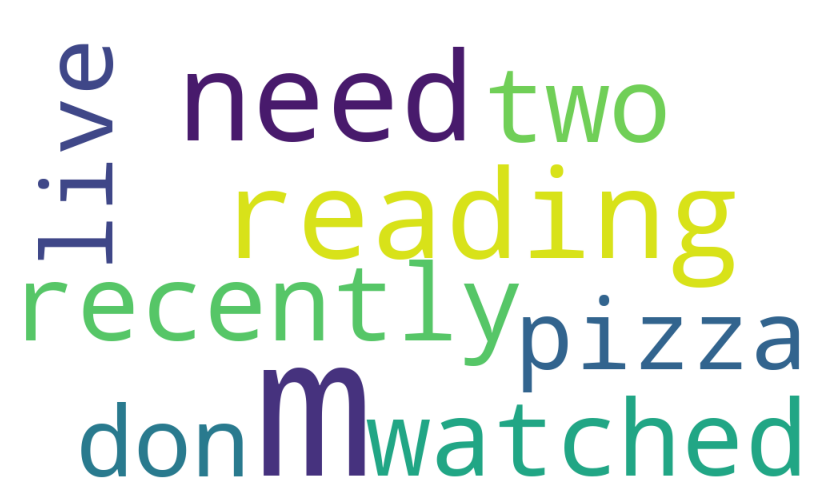

In [41]:
from wordcloud import WordCloud

#flatten the list of contexts
all_contexts = [context for contexts in df_new['Contexts'] for context in contexts]

#join all context into a single string
all_contexts_string = ' '.join(all_contexts)

wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', min_font_size = 10).generate(all_contexts_string)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [42]:
################### GRAMMAR CORRECTION WITh T5 MODEL ########################

In [43]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00


In [44]:
import torch
import optuna
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, DataLoader
from nltk.translate.bleu_score import sentence_bleu
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import SmoothingFunction
from transformers import T5Tokenizer, T5ForConditionalGeneration

#setting the device to cuda if available else cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

text_df = pd.read_csv("/content/Grammar Correction.csv", sep=",")


In [45]:
text_df.head(10)

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.
5,6,Verb Tense Errors,I am eat pizza for lunch.,I am eating pizza for lunch.
6,7,Verb Tense Errors,The students studies for the exam.,The students study for the exam.
7,8,Verb Tense Errors,The car need to be repaired.,The car needs to be repaired.
8,9,Verb Tense Errors,She will goes to the party tonight.,She will go to the party tonight.
9,10,Verb Tense Errors,They watches the movie together.,They watch the movie together.


Text(0, 0.5, 'Error Type')

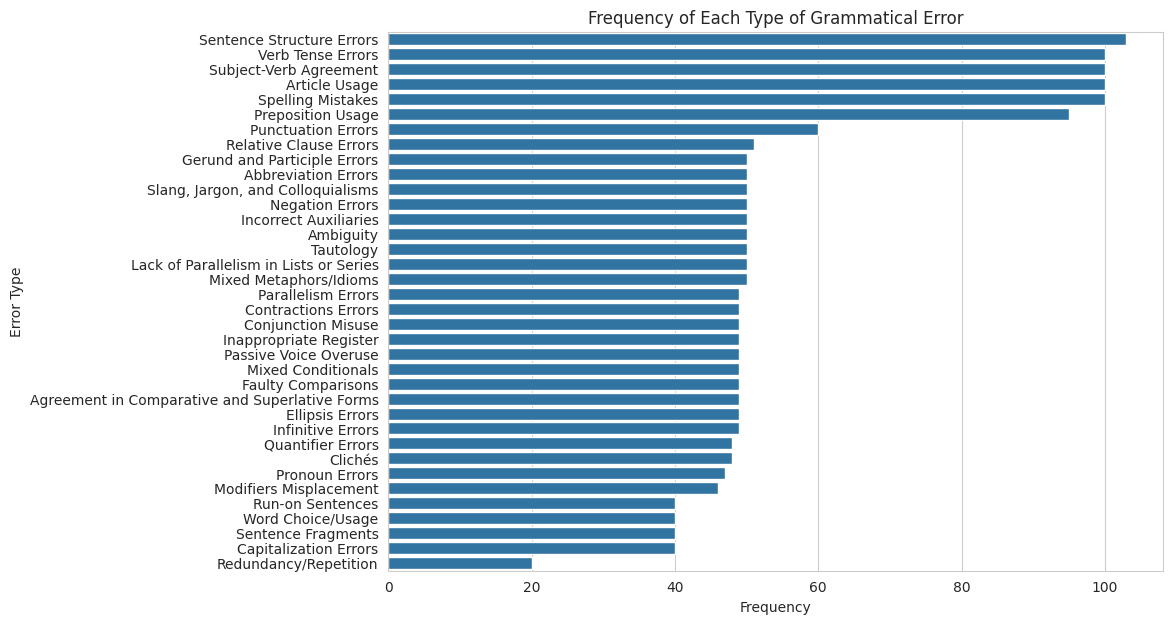

In [46]:
#displaying the shape of the dataset to understand the number of rows and columns in the dataset
sns.set_style("whitegrid")
plt.figure(figsize = (10, 7))
error_type_plot = sns.countplot(y = text_df["Error Type"], order = text_df["Error Type"].value_counts().index)
error_type_plot.set_title("Frequency of Each Type of Grammatical Error")
error_type_plot.set_xlabel("Frequency")
error_type_plot.set_ylabel('Error Type')

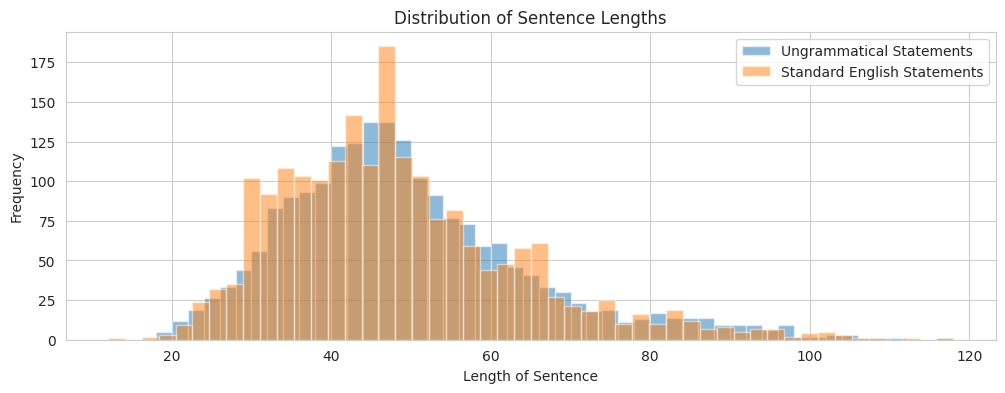

In [47]:
#adding the length of the ungrammatical and standard English statements to the dataset
text_df["Ungrammatical Length"] = text_df["Ungrammatical Statement"].apply(len)
text_df["Standard Length"] = text_df['Standard English'].apply(len)

#displaying the distribution of sentence lengths for the lengths for the ungrammatical and standard English statements
plt.figure(figsize = (12, 4))
plt.hist(text_df['Ungrammatical Length'], bins = 50, alpha = 0.5, label= "Ungrammatical Statements")
plt.hist(text_df["Standard Length"], bins = 50, alpha = 0.5, label = "Standard English Statements")
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Length of Sentence")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [48]:
# loading the pre-trained T5 model and tokenizer from the Hugging Face
# Transformers library and set the shared parameters
# (as freezing those parameters defined during the pre-trained stage
# to avoid catastrophic forgetting) to False

model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

# setting the shared parameters to False
for param in model.shared.parameters():
  param.requires_grad = False

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [54]:
# defining the GrammarCorrectionDataset class for the dataset
class GrammarCorrectionDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    # return the ungrammatical statement and the standard English statement
    def __getitem__(self, idx):
        ungrammatical_statement = self.dataframe.iloc[idx]["Ungrammatical Statement"]
        standard_english = self.dataframe.iloc[idx]["Standard English"]
        return ungrammatical_statement, standard_english

In [55]:
# spliting the dataset into training, validation, and test sets with 80%, 10%, and 10%
train_df, test_df = train_test_split(df, test_size = 0.2)
train_df, val_df = train_test_split(train_df, test_size = 0.1)

# Create the datasets
train_dataset = GrammarCorrectionDataset(train_df)
val_dataset = GrammarCorrectionDataset(val_df)
test_dataset = GrammarCorrectionDataset(test_df)


In [56]:
#defining the grammarCorrectionDataset class for the dataset
class GrammarCorrectionDataset(Dataset):
  def __init__(self, dataframe):
    self.dataframe = dataframe

    def __len__(self):
      return len(self.dataframe)

    #returning the ungrammatical statement and the standard English statement
    def __getitem__(self, idx):
      ungrammatical_statement = self.dataframe.iloc[idx]["Ungrammatical Statement"]
      standard_english = self.dataframe.iloc[idx]["Standard English"]
      return ungrammatical_statement, standard_english

In [58]:
#defining the train_epoch function to train the model for one epoch
def train_epoch(model, dataloader, optimizer, device, scheduler):
  #setting the model to the device
  model = model.to(device)
  #setting the model to training mode
  model.train()
  #initializing the toal loss to 0
  total_loss = 0
  # iterate over the dataloader to get the ungrammatical statement and the standard English statement
  for ungrammatical_statement, standard_english in dataloader:
    #move the inputs and labels to the device, set the configurations for the tokenizer, and get the outputs form the model
    inputs = tokenizer(ungrammatical_statement, return_tensors = "pt", padding= True, truncation=True, max_length = 256).to(device)
    labels = tokenizer(standard_english, return_tensors = "pt", padding = True, truncation = True, max_length = 256).input_ids.to(device)
    outputs = model(**inputs, labels = labels)
    # getting the loss from the outputs and add it to the total loss
    loss = outputs.loss
    total_loss += loss.item()
    #backpropagate the loss and update the optimizer
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #updating the scheduler
    scheduler.step()
    #calculating the average loss
    average_loss = total_loss/ len(dataloader)
    return average_loss

In [59]:
#defining the eval_model function to evaluate the model on the validation or test set
def eval_model(model, dataloader, device):
  #setting the model to device
  model = model.to(device)
  #setting the model to evaulation mode
  model.eval()
  #initializing the total BLEU score to 0
  total_bleu_score = 0
  #setting the smoothing function to method1
  smoothing = SmoothingFunction().method1
  with torch.no_grad():
    # iterating over the dataloader to get the ungrammatical statement and the standard English statement
    for ungrammatical_statement, standard_english in dataloader:
    #moving the inputs and labels to the device,set the configuration for the tokenizer, and get the outputs from the model
      inputs = tokenizer(ungrammatical_statement, return_tensors = "pt", padding = True, truncation = True, max_length = 256).to(device)
      labels = tokenizer(standard_english, return_tensors = "pt", padding = True, truncation = True, max_length = 256).input_ids.to(device)
      outputs = model.generate(**inputs, max_new_tokens = 256)
      #decoding the outputs and calculating the BLEU score
      corrected_english = tokenizer.decode(outputs[0], skip_special_tokens = True)
      reference = [standard_english[0].split()]
      candidate = corrected_english.split()
      bleu_score = sentence_bleu(reference, candidate, smoothing_function = smoothing)
      total_bleu_score += bleu_score
  average_bleu_score = total_bleu_score / len(dataloader)
  print(average_bleu_score)
  return average_bleu_score

In [60]:
# using optuna to tune the hyperparameters of the model and optimizer to improve the BLEU score on the validation set with 10 trials
def objective(trial):
  # defining the hyperparameters to tune
  learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True)
  num_train_epochs = trial.suggest_int("num_train_epochs", 1, 5)
  batch_size = trial.suggest_categorical("batch_size", [4, 8, 16, 32])

  #loading the pre-traqined T5 model and tokenizer from the Hugging Face Transformers library
  tokenizer = T5Tokenizer.from_pretrained("t5-base")
  model = T5ForConditionalGeneration.from_pretrained("t5-base")
  #setting the shared parameters to False
  for param in model.shared.parameters():
    param.requires_grad = False

  #setting the optimizer and scheduler
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
  scheduler = StepLR(optimizer, step_size = 1, gamma = 0.1)

  #creating the DataLoader for the training and validation
  train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
  val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle = True)
  test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

  #training the model for the specified number of epochs
  for epoch in range(num_train_epochs):
    #training the model for one epoch and print the average loss
    average_loss = train_epoch(model, train_dataloader, optimizer, device, scheduler)
    print(f"Epoch: {epoch+1}, Loss: {average_loss}")
    eval_model(model, val_dataloader, device)

    # evaluating the model with the validation set and the return the average BLEU score
    average_bleu_score = eval_model(model, test_dataloader, device)
    return average_bleu_score

  #creating the model with the validation set and return the average BLEU score
  average_bleu_score = eval_model(model, test_dataloader, device)
  return average_bleu_score

# creating a study and optimize the objective function with 5 trials
study = optuna.create_study(direction = "maximize", pruner = optuna.pruners.MedianPruner())
study.optimize(objective, n_trials = 5)
#printing the hyperparameters
print(study.best_params)

[I 2024-10-16 12:24:58,851] A new study created in memory with name: no-name-91a0f8e3-9450-4643-9935-64b45f722e31
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Epoch: 1, Loss: 0.02531816147185944
0.43593443753123123


[I 2024-10-16 12:31:52,401] Trial 0 finished with value: 0.39086285439488927 and parameters: {'learning_rate': 3.4580154698562223e-06, 'num_train_epochs': 1, 'batch_size': 8}. Best is trial 0 with value: 0.39086285439488927.


0.39086285439488927
Epoch: 1, Loss: 0.008706138810507193
0.2658567865919313


[I 2024-10-16 12:39:51,480] Trial 1 finished with value: 0.4158559145501036 and parameters: {'learning_rate': 1.5519944650415032e-05, 'num_train_epochs': 5, 'batch_size': 4}. Best is trial 1 with value: 0.4158559145501036.


0.4158559145501036
Epoch: 1, Loss: 0.17074774659198264
0.3869937507950991


[I 2024-10-16 12:46:47,477] Trial 2 finished with value: 0.4882245151062816 and parameters: {'learning_rate': 2.299451995978041e-05, 'num_train_epochs': 2, 'batch_size': 32}. Best is trial 2 with value: 0.4882245151062816.


0.4882245151062816
Epoch: 1, Loss: 0.012176030266711864
0.41399870278308715


[I 2024-10-16 12:54:40,644] Trial 3 finished with value: 0.40929146163579017 and parameters: {'learning_rate': 4.47106855977874e-06, 'num_train_epochs': 4, 'batch_size': 4}. Best is trial 2 with value: 0.4882245151062816.


0.40929146163579017
Epoch: 1, Loss: 0.173797607421875
0.23758922394977647


[I 2024-10-16 13:02:51,147] Trial 4 finished with value: 0.310804488540145 and parameters: {'learning_rate': 6.123672452593416e-05, 'num_train_epochs': 4, 'batch_size': 32}. Best is trial 2 with value: 0.4882245151062816.


0.310804488540145
{'learning_rate': 2.299451995978041e-05, 'num_train_epochs': 2, 'batch_size': 32}


In [63]:
#loading the pre-trained T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

#setting the shared parameters to False
for param in model.shared.parameters():
  param.requires_grad = False

#setting the device to cuda if available or else cpu
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [66]:
#gettting the best hyperparameters from the study
learning_rate = study.best_params["learning_rate"]
num_train_epochs = study.best_params["num_train_epochs"]
per_device_train_batch_size = study.best_params["batch_size"]

#setting the optimizer and scheduler with the best hyperparameters
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size = 1, gamma = 0.1)

#creating the DataLoader for the training, validation, and test set5s with the best hyperparameters (the batch size)
train_dataloader = DataLoader(train_dataset, batch_size = per_device_train_batch_size, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = per_device_train_batch_size, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = per_device_train_batch_size, shuffle = True)

#training the model and the specified number of epochs with the best hyperparametes and evaluate the model on the validation adn test sets
for epoch in range(num_train_epochs):
  average_loss = train_epoch(model, train_dataloader, optimizer, device, scheduler)
  print(f"Epoch: {epoch+1}, Loss {average_loss}")
  eval_model(model, val_dataloader, device)

#evaluating the model on the test set with the best hyperparameters and print the average BLEU score
eval_model(model, test_dataloader, device)


Epoch: 1, Loss 0.1425710450048032
0.48986316518455525
Epoch: 2, Loss 0.11802021316860033
0.35476583624807123
0.46386679828217636


0.46386679828217636

In [70]:
#implementing the fine-tunes model on the dataset to correct the ungrammatical statements
def correct_grammar(model, ungrammatical_statement):
  #setting the model to evaluation
  model.eval()
  #tokenizing the ungrammatical statements and getting the outputs from the model
  inputs = tokenizer(ungrammatical_statement, return_tensors = "pt", padding = True, truncation = True, max_length =256).to(device)
  outputs = model.generate(**inputs, max_new_tokens = 256)
  #decoding the outputs and return the corrected English statement
  corrected_english = tokenizer.decode(outputs[0], skip_special_tokens = True)
  return corrected_english

#correcting the ungrammatical statements in the dataset
test_df["Corrected English"] = text_df["Ungrammatical Statement"].apply(lambda x: correct_grammar(model, x))

In [71]:
test_df.head(20)

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Corrected English
1553,1554,Negation Errors,I won't accept no apologies.,I won't accept any apologies.,I will accept no apologies.
1819,1820,Relative Clause Errors,The cake I ate it for dessert was delicious.,The cake I ate for dessert was delicious.,was delicious. was delicious.
1352,1353,Ambiguity,The cat hid under the table because the dog ba...,The cat hid under the table because the dog wa...,because the dog barked. The cat hid under the ...
850,851,Mixed Metaphors/Idioms,"13. You can't have your cake and eat it too, b...",13. You can't have your cake and eat it too.,"You can't have your cake and eat it too, but i..."
1055,1056,Modifiers Misplacement,The flowers were planted by the gardener along...,The flowers blooming beautifully were planted ...,along the pathway blooming beautifully.
1108,1109,Agreement in Comparative and Superlative Forms,The new software is most more user-friendly th...,The new software is more user-friendly than th...,is much more user-friendly than the old one.
1251,1252,Tautology,The weather outside is cold and chilly today.,The weather outside is cold today.,Today is cold and chilly.
395,396,Sentence Structure Errors,I be going to the store to buy groceries.,I am going to the store to buy groceries.,going to the store to buy groceries.
626,627,Punctuation Errors,"I have to go to the bank, get groceries, and p...","I have to go to the bank, get groceries, and p...","have to go to the bank, get groceries, and pic..."
1514,1515,Incorrect Auxiliaries,He were helping his friend move furniture.,He was helping his friend move furniture.,friend move furniture. He were helping his fri...


In [72]:
text_df.tail(20)

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Length,Standard Length
1998,1999,Lack of Parallelism in Lists or Series,"The store offers a wide range of products, com...","The store offers a wide range of products, com...",105,103
1999,2000,Lack of Parallelism in Lists or Series,"The vacation package includes flights, accommo...","The vacation package includes flights, accommo...",80,78
2000,2001,Lack of Parallelism in Lists or Series,"The manager expects employees to be punctual, ...","The manager expects employees to be punctual, ...",84,81
2001,2002,Lack of Parallelism in Lists or Series,"The strategy involves analyzing market trends,...","The strategy involves analyzing market trends,...",102,102
2002,2003,Lack of Parallelism in Lists or Series,"The event will feature live music, delicious f...","The event will feature live music, delicious f...",82,79
2003,2004,Lack of Parallelism in Lists or Series,The article discusses the importance of educat...,The article discusses the importance of educat...,103,102
2004,2005,Lack of Parallelism in Lists or Series,"The exercise routine includes stretching, stre...","The exercise routine includes stretching, stre...",88,82
2005,2006,Lack of Parallelism in Lists or Series,The government is committed to reducing povert...,The government is committed to reducing povert...,104,103
2006,2007,Lack of Parallelism in Lists or Series,"The app allows users to track their expenses, ...","The app allows users to track their expenses, ...",89,86
2007,2008,Lack of Parallelism in Lists or Series,"The exhibition showcases contemporary art, pho...","The exhibition showcases contemporary art, pho...",84,82
